In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [15]:
data = pd.read_csv('data/Auto.csv', na_values='?').dropna()
data.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0       130.0    3504          12.0    70   
1  15.0          8         350.0       165.0    3693          11.5    70   
2  18.0          8         318.0       150.0    3436          11.0    70   
3  16.0          8         304.0       150.0    3433          12.0    70   
4  17.0          8         302.0       140.0    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [16]:
data['mpg01'] = [1 if x >= data['mpg'].median() else 0 for x in data['mpg']]
data.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0       130.0    3504          12.0    70   
1  15.0          8         350.0       165.0    3693          11.5    70   
2  18.0          8         318.0       150.0    3436          11.0    70   
3  16.0          8         304.0       150.0    3433          12.0    70   
4  17.0          8         302.0       140.0    3449          10.5    70   

   origin                       name  mpg01  
0       1  chevrolet chevelle malibu      0  
1       1          buick skylark 320      0  
2       1         plymouth satellite      0  
3       1              amc rebel sst      0  
4       1                ford torino      0

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
 9   mpg01         392 non-null    int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 33.7+ KB


<Figure size 864x864 with 0 Axes>

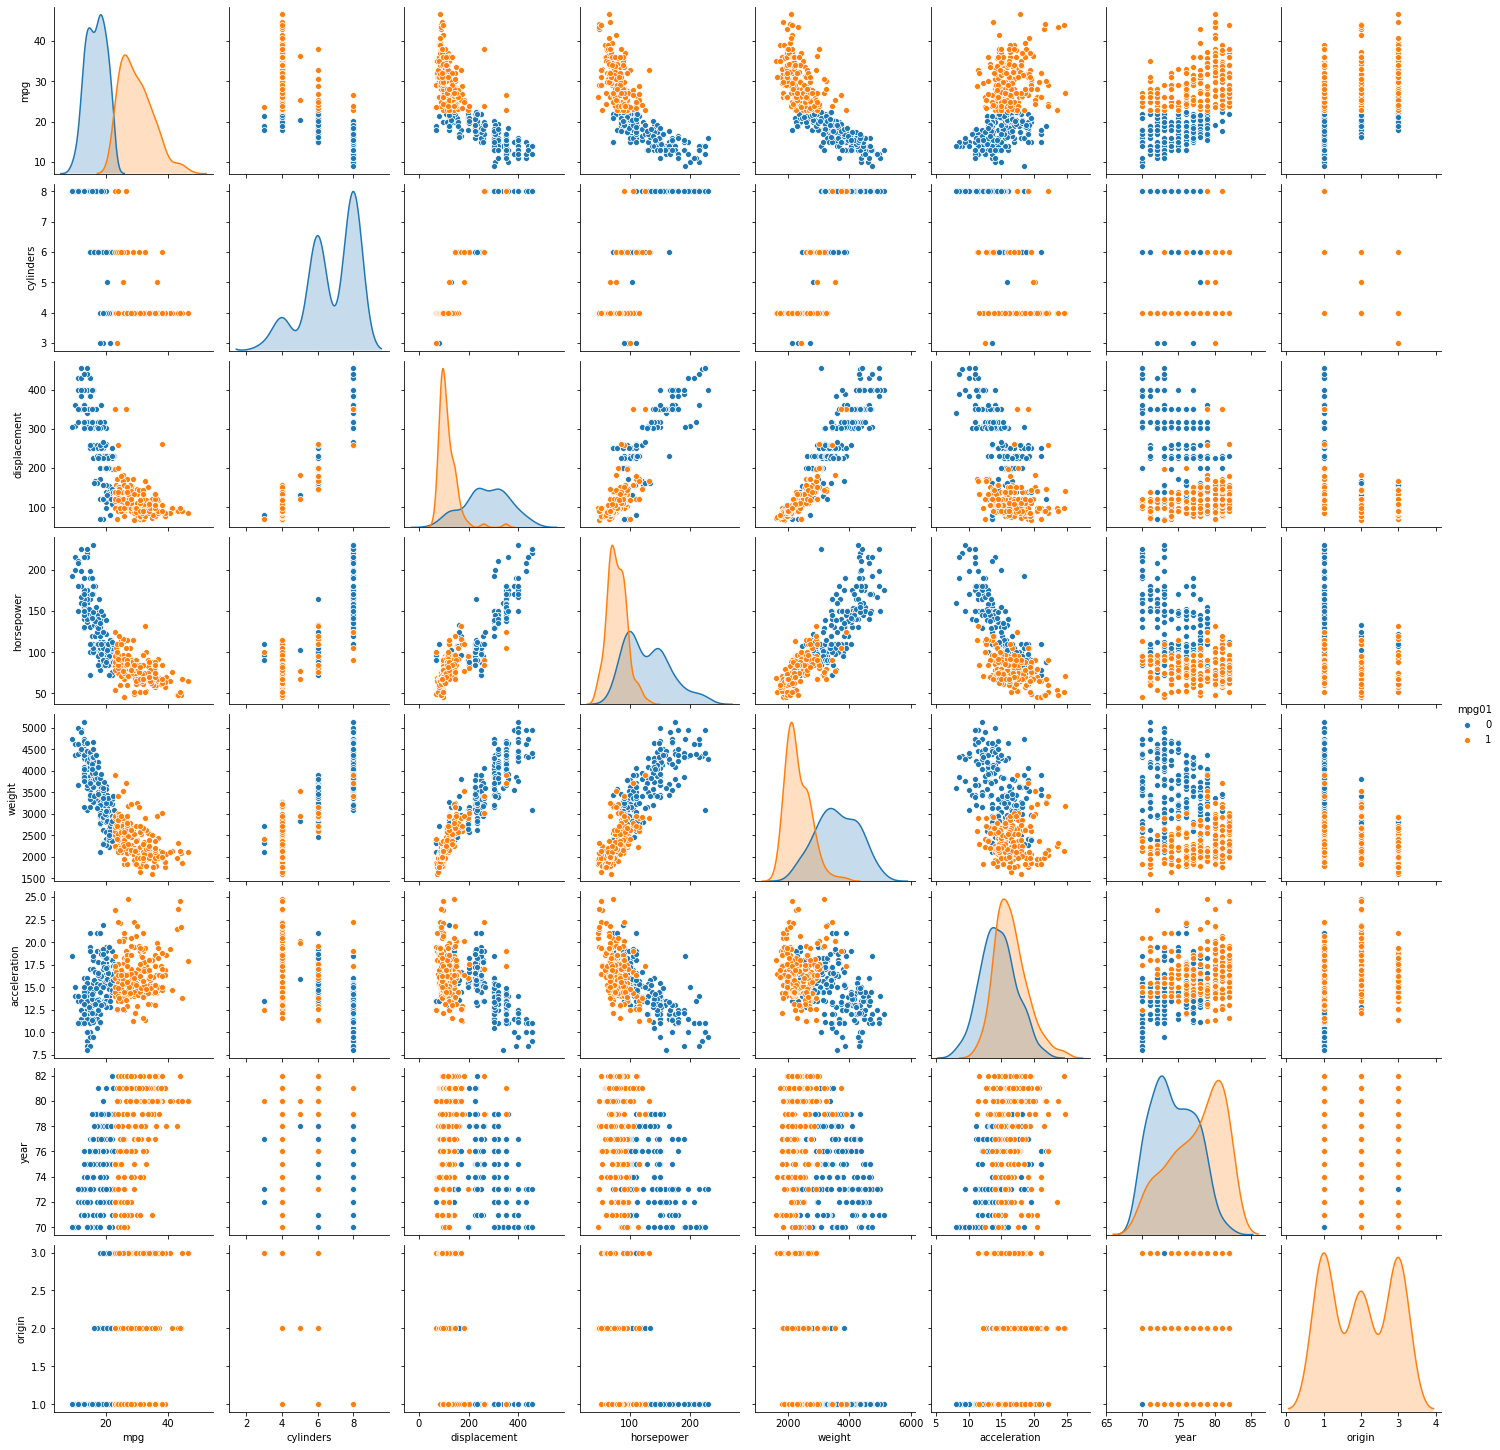

In [18]:
plt.figure(figsize=(12,12))
sb.pairplot(data=data, hue='mpg01');

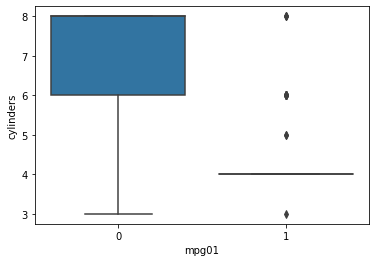

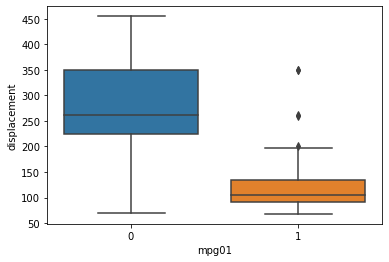

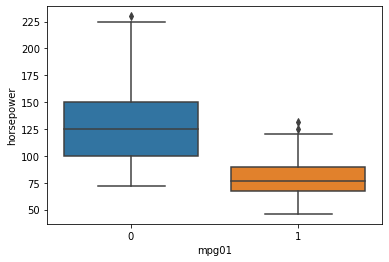

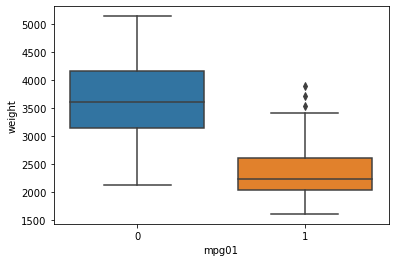

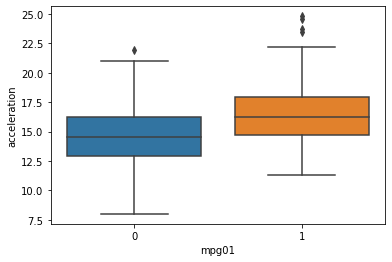

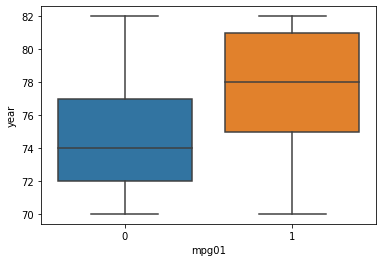

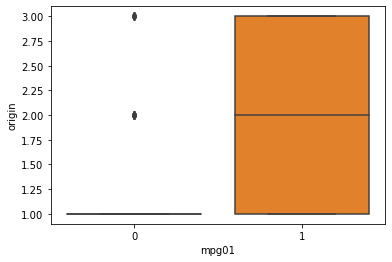

In [35]:
for i in data.columns.drop(['mpg01', 'name', 'mpg']):
    sb.boxplot(data=data, y=i, x='mpg01')
    plt.show()

In [39]:
data.corr()['mpg01']

mpg             0.836939
cylinders      -0.759194
displacement   -0.753477
horsepower     -0.667053
weight         -0.757757
acceleration    0.346822
year            0.429904
origin          0.513698
mpg01           1.000000
Name: mpg01, dtype: float64

In [151]:
predictors = ['cylinders', 'displacement', 'horsepower', 'weight']
predictors_visual = ['horsepower', 'weight']
data_train, data_test = train_test_split(data, test_size=0.3, random_state=1)

In [152]:
X_train, X_test, y_train, y_test = train_test_split(data[predictors], data['mpg01'], test_size=0.3, random_state=1)
# Perform LDA
lda = LDA().fit(X_train, y_train)
lda_pred = lda.predict(X_test)
print('Test accuracy: %.3f' %np.mean(lda_pred==y_test))
print('Test error: %.3f' %(1-np.mean(lda_pred==y_test)))
print('==========================================')
print(pd.DataFrame(confusion_matrix(y_test, lda_pred), [0,1], ['Pred 0', 'Pred 1']))
print('==========================================')
print(classification_report(y_test, lda_pred))

Test accuracy: 0.915
Test error: 0.085
   Pred 0  Pred 1
0      58       7
1       3      50
              precision    recall  f1-score   support

           0       0.95      0.89      0.92        65
           1       0.88      0.94      0.91        53

    accuracy                           0.92       118
   macro avg       0.91      0.92      0.91       118
weighted avg       0.92      0.92      0.92       118



In [153]:
# Perform QDA
qda = QDA().fit(X_train, y_train)
qda_pred = qda.predict(X_test)
print('Test accuracy: %.3f' %np.mean(qda_pred==y_test))
print('Test error: %.3f' %(1-np.mean(qda_pred==y_test)))
print('==========================================')
print(pd.DataFrame(confusion_matrix(y_test, qda_pred), [0,1], ['Pred 0', 'Pred 1']))
print('==========================================')
print(classification_report(y_test, qda_pred))

Test accuracy: 0.924
Test error: 0.076
   Pred 0  Pred 1
0      61       4
1       5      48
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        65
           1       0.92      0.91      0.91        53

    accuracy                           0.92       118
   macro avg       0.92      0.92      0.92       118
weighted avg       0.92      0.92      0.92       118



In [154]:
# Perform Logistic Regression by Sklearn
lr = LR().fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print('Test accuracy: %.3f' %np.mean(lr_pred==y_test))
print('Test error: %.3f' %(1-np.mean(lr_pred==y_test)))
print('==========================================')
print(pd.DataFrame(confusion_matrix(y_test, lr_pred), [0,1], ['Pred 0', 'Pred 1']))
print('==========================================')
print(classification_report(y_test, lr_pred))

Test accuracy: 0.915
Test error: 0.085
   Pred 0  Pred 1
0      59       6
1       4      49
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        65
           1       0.89      0.92      0.91        53

    accuracy                           0.92       118
   macro avg       0.91      0.92      0.91       118
weighted avg       0.92      0.92      0.92       118

[[ 0.06257653 -0.0150165  -0.0360313  -0.00141176]]


In [218]:
# Perform Logistic Regression by Statsmodel
lr_stats = smf.glm(formula='mpg01 ~ ' + ' + '.join(predictors), data=data_train, family=sm.families.Binomial()).fit()
print(lr_stats.summary())
lr_stats_pred = lr_stats.predict(data_test)
lr_stats_pred = [1 if x >=0.5 else 0 for x in lr_stats_pred]
print('Test accuracy: %.3f' %np.mean(lr_stats_pred==y_test))
print('Test error: %.3f' %(1-np.mean(lr_stats_pred==y_test)))
print('==========================================')
print(pd.DataFrame(confusion_matrix(y_test, lr_stats_pred), [0,1], ['Pred 0', 'Pred 1']))
print('==========================================')
print(classification_report(y_test, lr_stats_pred))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  mpg01   No. Observations:                  274
Model:                            GLM   Df Residuals:                      269
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -81.148
Date:                Fri, 09 Oct 2020   Deviance:                       162.30
Time:                        00:15:13   Pearson chi2:                     352.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        9.7488      1.800      5.415   

In [159]:
# Perform KNN with K = 1
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print('Test accuracy: %.3f' %np.mean(knn_pred==y_test))
print('Test error: %.3f' %(1-np.mean(knn_pred==y_test)))
print('==========================================')
print(pd.DataFrame(confusion_matrix(y_test, knn_pred), [0,1], ['Pred 0', 'Pred 1']))
print('==========================================')
print(classification_report(y_test, knn_pred))

Test accuracy: 0.881
Test error: 0.119
   Pred 0  Pred 1
0      55      10
1       4      49
              precision    recall  f1-score   support

           0       0.93      0.85      0.89        65
           1       0.83      0.92      0.88        53

    accuracy                           0.88       118
   macro avg       0.88      0.89      0.88       118
weighted avg       0.89      0.88      0.88       118



In [190]:
# Find optimal k
result_knn = pd.DataFrame(columns=['k', 'Accuracy'])
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    result_knn = result_knn.append({'k':i, 'Accuracy': np.mean(knn_pred==y_test)},ignore_index=True)
print(result_knn[result_knn['Accuracy']==result_knn['Accuracy'].max()])

     k  Accuracy
7  8.0  0.915254


In [191]:
# Perform KNN with K = 8
knn = KNeighborsClassifier(n_neighbors=8).fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print('Test accuracy: %.3f' %np.mean(knn_pred==y_test))
print('Test error: %.3f' %(1-np.mean(knn_pred==y_test)))
print('==========================================')
print(pd.DataFrame(confusion_matrix(y_test, knn_pred), [0,1], ['Pred 0', 'Pred 1']))
print('==========================================')
print(classification_report(y_test, knn_pred))

Test accuracy: 0.915
Test error: 0.085
   Pred 0  Pred 1
0      60       5
1       5      48
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        65
           1       0.91      0.91      0.91        53

    accuracy                           0.92       118
   macro avg       0.91      0.91      0.91       118
weighted avg       0.92      0.92      0.92       118



## Visualization

In [196]:
# Use Weight & Horsepower to predict and draw scatterplot
X_train_2, X_test_2, y_train, y_test = train_test_split(data[predictors_visual], data['mpg01'], test_size=0.3, random_state=1)
# Perform LDA
lda_2 = LDA().fit(X_train_2, y_train)
lda_2_pred = lda_2.predict(X_test_2)
print('Test accuracy: %.3f' %np.mean(lda_2_pred==y_test))
print('Test error: %.3f' %(1-np.mean(lda_2_pred==y_test)))
print('==========================================')
print(pd.DataFrame(confusion_matrix(y_test, lda_2_pred), [0,1], ['Pred 0', 'Pred 1']))
print('==========================================')
print(classification_report(y_test, lda_2_pred))

Test accuracy: 0.890
Test error: 0.110
   Pred 0  Pred 1
0      53      12
1       1      52
              precision    recall  f1-score   support

           0       0.98      0.82      0.89        65
           1       0.81      0.98      0.89        53

    accuracy                           0.89       118
   macro avg       0.90      0.90      0.89       118
weighted avg       0.91      0.89      0.89       118



In [197]:
# Perform QDA
qda_2 = QDA().fit(X_train_2, y_train)
qda_2_pred = qda_2.predict(X_test_2)
print('Test accuracy: %.3f' %np.mean(qda_2_pred==y_test))
print('Test error: %.3f' %(1-np.mean(qda_2_pred==y_test)))
print('==========================================')
print(pd.DataFrame(confusion_matrix(y_test, qda_2_pred), [0,1], ['Pred 0', 'Pred 1']))
print('==========================================')
print(classification_report(y_test, qda_2_pred))

Test accuracy: 0.890
Test error: 0.110
   Pred 0  Pred 1
0      53      12
1       1      52
              precision    recall  f1-score   support

           0       0.98      0.82      0.89        65
           1       0.81      0.98      0.89        53

    accuracy                           0.89       118
   macro avg       0.90      0.90      0.89       118
weighted avg       0.91      0.89      0.89       118



In [199]:
# Perform Logistic Regression by Sklearn
lr_2 = LR().fit(X_train_2, y_train)
lr_2_pred = lr_2.predict(X_test_2)
print('Test accuracy: %.3f' %np.mean(lr_2_pred==y_test))
print('Test error: %.3f' %(1-np.mean(lr_2_pred==y_test)))
print('==========================================')
print(pd.DataFrame(confusion_matrix(y_test, lr_2_pred), [0,1], ['Pred 0', 'Pred 1']))
print('==========================================')
print(classification_report(y_test, lr_2_pred))

Test accuracy: 0.949
Test error: 0.051
   Pred 0  Pred 1
0      61       4
1       2      51
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        65
           1       0.93      0.96      0.94        53

    accuracy                           0.95       118
   macro avg       0.95      0.95      0.95       118
weighted avg       0.95      0.95      0.95       118



In [206]:
# Perform Logistic Regression by Sklearn
knn_2 = KNeighborsClassifier(n_neighbors=20).fit(X_train_2, y_train)
knn_2_pred = knn_2.predict(X_test_2)
print('Test accuracy: %.3f' %np.mean(knn_2_pred==y_test))
print('Test error: %.3f' %(1-np.mean(knn_2_pred==y_test)))
print('==========================================')
print(pd.DataFrame(confusion_matrix(y_test, knn_2_pred), [0,1], ['Pred 0', 'Pred 1']))
print('==========================================')
print(classification_report(y_test, knn_2_pred))

Test accuracy: 0.881
Test error: 0.119
   Pred 0  Pred 1
0      54      11
1       3      50
              precision    recall  f1-score   support

           0       0.95      0.83      0.89        65
           1       0.82      0.94      0.88        53

    accuracy                           0.88       118
   macro avg       0.88      0.89      0.88       118
weighted avg       0.89      0.88      0.88       118



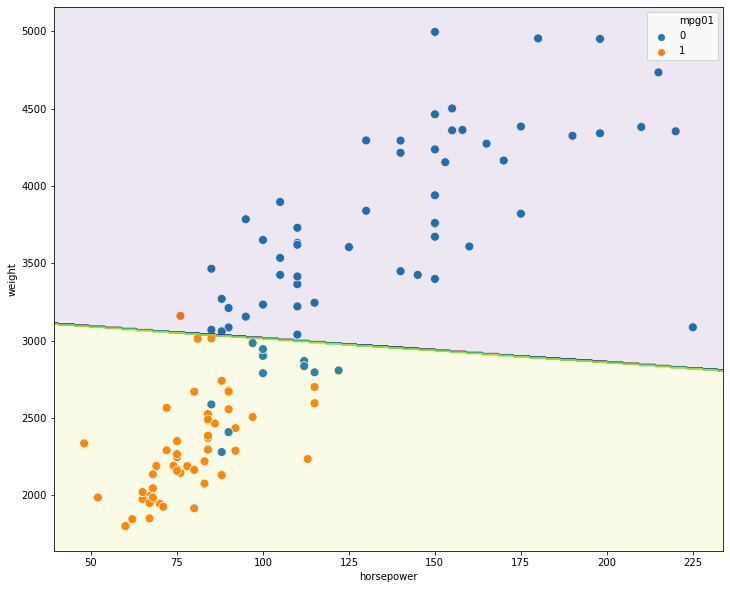

In [192]:
# LDA
plt.figure(figsize=(12,10))
sb.scatterplot(data=X_test_2, x='horsepower', y='weight', hue=y_test, s=80)
# Create Grid X, Y, Z
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
X = np.linspace(x_min, x_max, 500)
Y = np.linspace(y_min, y_max, 500)
X, Y = np.meshgrid(X, Y)
Z = lda_2.predict(np.c_[X.ravel(), Y.ravel()]).reshape(X.shape)
# LDA area and boundary
plt.contourf(X, Y, Z, alpha=0.1)
plt.contour(X, Y, Z, linewidth=0.3, color='k')
plt.show()

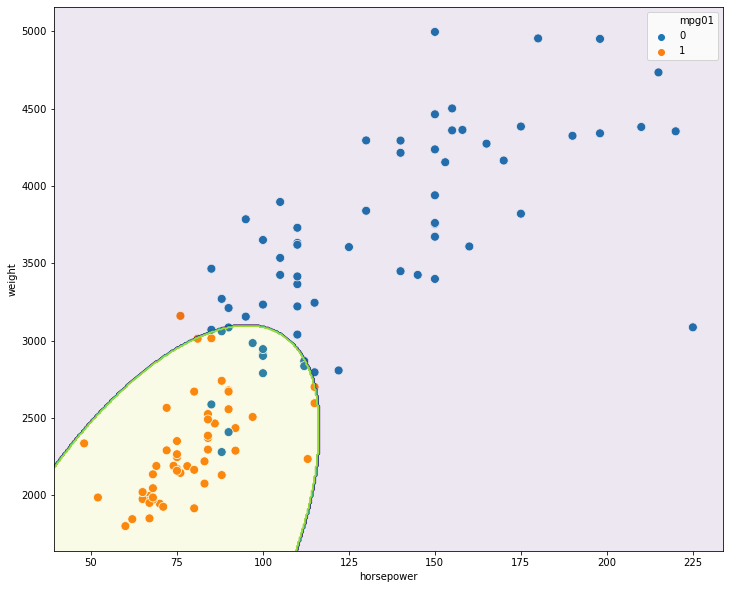

In [193]:
# QDA
plt.figure(figsize=(12,10))
sb.scatterplot(data=X_test_2, x='horsepower', y='weight', hue=y_test, s=80)
# Create Grid X, Y, Z
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
X = np.linspace(x_min, x_max, 500)
Y = np.linspace(y_min, y_max, 500)
X, Y = np.meshgrid(X, Y)
Z = qda_2.predict(np.c_[X.ravel(), Y.ravel()]).reshape(X.shape)
# LDA area and boundary
plt.contourf(X, Y, Z, alpha=0.1)
plt.contour(X, Y, Z, linewidth=0.3, color='k')
plt.show()

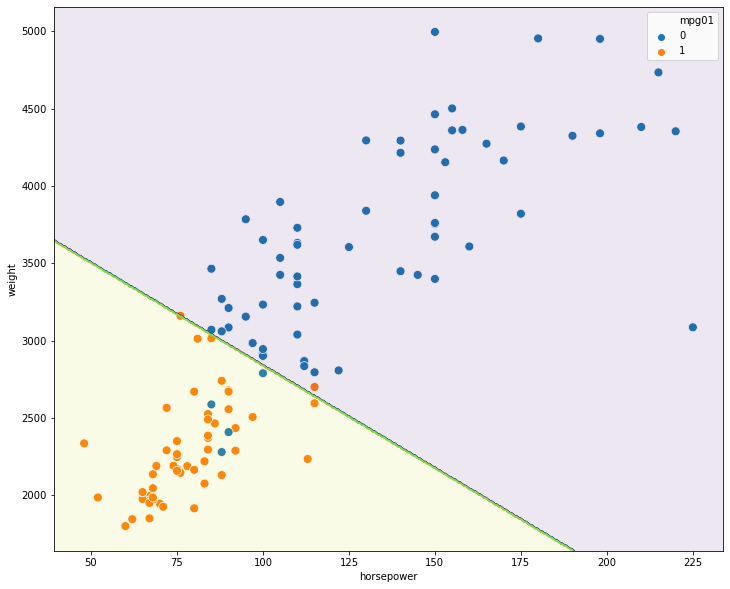

In [201]:
# Logistic Regression
plt.figure(figsize=(12,10))
sb.scatterplot(data=X_test_2, x='horsepower', y='weight', hue=y_test, s=80)
# Create Grid X, Y, Z
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
X = np.linspace(x_min, x_max, 500)
Y = np.linspace(y_min, y_max, 500)
X, Y = np.meshgrid(X, Y)
Z = lr_2.predict(np.c_[X.ravel(), Y.ravel()]).reshape(X.shape)
# LDA area and boundary
plt.contourf(X, Y, Z, alpha=0.1)
plt.contour(X, Y, Z, linewidth=0.3, color='k')
plt.show()

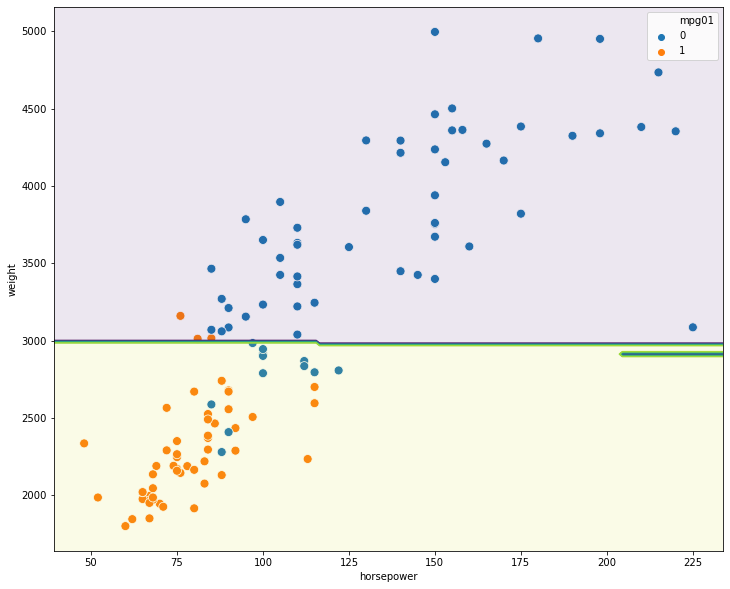

In [207]:
# KNN with k = 8
plt.figure(figsize=(12,10))
sb.scatterplot(data=X_test_2, x='horsepower', y='weight', hue=y_test, s=80)
# Create Grid X, Y, Z
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
X = np.linspace(x_min, x_max, 200)
Y = np.linspace(y_min, y_max, 200)
X, Y = np.meshgrid(X, Y)
Z = knn_2.predict(np.c_[X.ravel(), Y.ravel()]).reshape(X.shape)
# LDA area and boundary
plt.contourf(X, Y, Z, alpha=0.1)
plt.contour(X, Y, Z, linewidth=0.3, color='k')
plt.show()